<a href="https://colab.research.google.com/github/bbrauser/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/Brad_Brauser_LS_DS_432_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, Adamax, Ftrl, Nadam, Optimizer, RMSprop, SGD

In [ ]:
def load_quickdraw10(path):
  data = np.load(path)
  X = data['arr_0']
  y = data['arr_1']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

11493376/11490434 [==============================] - 0s 0us/step


### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [ ]:
##### Your Code Here #####

def create_model(optimizer=SGD, lr=.01):
  model = Sequential(
      [
       Dense(32, activation='relu', input_dim=784),
       Dense(32, activation='relu'),
       Dense(10, activation='softmax')       
      ]
)
  model.compile(loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [ ]:
mnist_model_8 = create_model()

bt_8 = mnist_model_8.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=8,
                                validation_data=(X_test, y_test))

Epoch 1/25
7500/7500 [==============================] - 15s 2ms/step - loss: 0.3172 - accuracy: 0.9092 - val_loss: 0.2050 - val_accuracy: 0.9433
Epoch 2/25
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1919 - accuracy: 0.9478 - val_loss: 0.1765 - val_accuracy: 0.9524
Epoch 3/25
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1712 - accuracy: 0.9566 - val_loss: 0.1656 - val_accuracy: 0.9569
Epoch 4/25
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1646 - accuracy: 0.9596 - val_loss: 0.1811 - val_accuracy: 0.9574
Epoch 5/25
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1630 - accuracy: 0.9628 - val_loss: 0.2207 - val_accuracy: 0.9576
Epoch 6/25
7500/7500 [==============================] - 16s 2ms/step - loss: 0.1647 - accuracy: 0.9639 - val_loss: 0.2004 - val_accuracy: 0.9619
Epoch 7/25
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1589 - accuracy: 0.9659 - val_loss: 0.2070 - val_ac

In [ ]:
mnist_model_32 = create_model()

bt_32 = mnist_model_32.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3555 - accuracy: 0.9000 - val_loss: 0.2057 - val_accuracy: 0.9371
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1791 - accuracy: 0.9470 - val_loss: 0.1625 - val_accuracy: 0.9524
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1402 - accuracy: 0.9589 - val_loss: 0.1476 - val_accuracy: 0.9549
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1220 - accuracy: 0.9631 - val_loss: 0.1304 - val_accuracy: 0.9625
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1090 - accuracy: 0.9682 - val_loss: 0.1255 - val_accuracy: 0.9646
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0997 - accuracy: 0.9710 - val_loss: 0.1285 - val_accuracy: 0.9651
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0926 - accuracy: 0.9732 - val_loss: 0.1363 - val_accuracy:

In [ ]:
mnist_model_128 = create_model()

bt_128 = mnist_model_128.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=128,
                                validation_data=(X_test, y_test))

Epoch 1/25
469/469 [==============================] - 1s 3ms/step - loss: 0.4943 - accuracy: 0.8667 - val_loss: 0.2587 - val_accuracy: 0.9239
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: 0.2414 - accuracy: 0.9300 - val_loss: 0.2172 - val_accuracy: 0.9352
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1950 - accuracy: 0.9434 - val_loss: 0.1818 - val_accuracy: 0.9444
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.9512 - val_loss: 0.1561 - val_accuracy: 0.9526
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1439 - accuracy: 0.9570 - val_loss: 0.1410 - val_accuracy: 0.9562
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1268 - accuracy: 0.9627 - val_loss: 0.1354 - val_accuracy: 0.9583
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 0.1141 - accuracy: 0.9662 - val_loss: 0.1257 - val_accuracy: 0.9607
Epoch 

In [ ]:
mnist_model_256 = create_model()

bt_256 = mnist_model_256.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=256,
                                validation_data=(X_test, y_test))

Epoch 1/25
235/235 [==============================] - 1s 3ms/step - loss: 0.5684 - accuracy: 0.8500 - val_loss: 0.2962 - val_accuracy: 0.9131
Epoch 2/25
235/235 [==============================] - 1s 3ms/step - loss: 0.2571 - accuracy: 0.9257 - val_loss: 0.2505 - val_accuracy: 0.9242
Epoch 3/25
235/235 [==============================] - 1s 3ms/step - loss: 0.2079 - accuracy: 0.9394 - val_loss: 0.1925 - val_accuracy: 0.9407
Epoch 4/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1789 - accuracy: 0.9476 - val_loss: 0.1680 - val_accuracy: 0.9486
Epoch 5/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1588 - accuracy: 0.9536 - val_loss: 0.1553 - val_accuracy: 0.9539
Epoch 6/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1436 - accuracy: 0.9575 - val_loss: 0.1488 - val_accuracy: 0.9572
Epoch 7/25
235/235 [==============================] - 1s 3ms/step - loss: 0.1315 - accuracy: 0.9604 - val_loss: 0.1511 - val_accuracy: 0.9555
Epoch 

In [ ]:
mnist_model_512 = create_model()

bt_512 = mnist_model_512.fit(X_train, y_train,
                                # Hyperparameters!
                                epochs=25,
                                batch_size=512,
                                validation_data=(X_test, y_test))

Epoch 1/25
118/118 [==============================] - 0s 4ms/step - loss: 0.7749 - accuracy: 0.8008 - val_loss: 0.3876 - val_accuracy: 0.8896
Epoch 2/25
118/118 [==============================] - 0s 3ms/step - loss: 0.3230 - accuracy: 0.9079 - val_loss: 0.3117 - val_accuracy: 0.9012
Epoch 3/25
118/118 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.9244 - val_loss: 0.2648 - val_accuracy: 0.9209
Epoch 4/25
118/118 [==============================] - 0s 3ms/step - loss: 0.2232 - accuracy: 0.9358 - val_loss: 0.2112 - val_accuracy: 0.9385
Epoch 5/25
118/118 [==============================] - 0s 3ms/step - loss: 0.1979 - accuracy: 0.9430 - val_loss: 0.2151 - val_accuracy: 0.9365
Epoch 6/25
118/118 [==============================] - 0s 3ms/step - loss: 0.1785 - accuracy: 0.9479 - val_loss: 0.1769 - val_accuracy: 0.9468
Epoch 7/25
118/118 [==============================] - 0s 3ms/step - loss: 0.1640 - accuracy: 0.9527 - val_loss: 0.2019 - val_accuracy: 0.9393
Epoch 

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([bt_8, bt_32, bt_128, bt_256, bt_512], ["8_", "32_", "128_", "256_", "512_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.317242,0.909150,0.205025,0.9433,0,8_
1,0.191944,0.947800,0.176521,0.9524,1,8_
2,0.171206,0.956583,0.165573,0.9569,2,8_
3,0.164642,0.959650,0.181072,0.9574,3,8_
4,0.162956,0.962850,0.220717,0.9576,4,8_


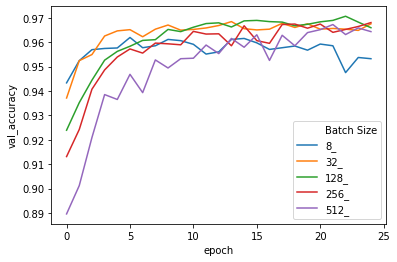

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

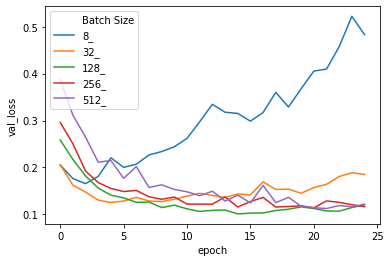

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Batch Size', data=df);

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [ ]:
lr_1 = create_model(lr=1).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3238 - accuracy: 0.9078 - val_loss: 0.1976 - val_accuracy: 0.9390
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1765 - accuracy: 0.9488 - val_loss: 0.1644 - val_accuracy: 0.9492
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1386 - accuracy: 0.9589 - val_loss: 0.1435 - val_accuracy: 0.9578
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1198 - accuracy: 0.9653 - val_loss: 0.1297 - val_accuracy: 0.9635
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9692 - val_loss: 0.1237 - val_accuracy: 0.9671
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0994 - accuracy: 0.9711 - val_loss: 0.1174 - val_accuracy: 0.9684
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0919 - accuracy: 0.9736 - val_loss: 0.1227 - val_accuracy:

In [ ]:
lr_p1 = create_model(lr=0.1).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3267 - accuracy: 0.9076 - val_loss: 0.1924 - val_accuracy: 0.9440
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1768 - accuracy: 0.9487 - val_loss: 0.1555 - val_accuracy: 0.9557
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1448 - accuracy: 0.9580 - val_loss: 0.1414 - val_accuracy: 0.9591
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1282 - accuracy: 0.9632 - val_loss: 0.1337 - val_accuracy: 0.9642
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1158 - accuracy: 0.9667 - val_loss: 0.1353 - val_accuracy: 0.9625
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9701 - val_loss: 0.1491 - val_accuracy: 0.9618
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0982 - accuracy: 0.9727 - val_loss: 0.1370 - val_accuracy:

In [ ]:
lr_01 = create_model(lr=0.01).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3519 - accuracy: 0.8982 - val_loss: 0.1906 - val_accuracy: 0.9448
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1788 - accuracy: 0.9486 - val_loss: 0.1546 - val_accuracy: 0.9541
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1409 - accuracy: 0.9599 - val_loss: 0.1285 - val_accuracy: 0.9618
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1216 - accuracy: 0.9645 - val_loss: 0.1195 - val_accuracy: 0.9647
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1104 - accuracy: 0.9674 - val_loss: 0.1264 - val_accuracy: 0.9632
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1007 - accuracy: 0.9704 - val_loss: 0.1145 - val_accuracy: 0.9681
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0932 - accuracy: 0.9732 - val_loss: 0.1206 - val_accuracy:

In [ ]:
lr_001 = create_model(lr=0.001).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3428 - accuracy: 0.9007 - val_loss: 0.1845 - val_accuracy: 0.9455
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1718 - accuracy: 0.9488 - val_loss: 0.1528 - val_accuracy: 0.9544
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1381 - accuracy: 0.9591 - val_loss: 0.1372 - val_accuracy: 0.9591
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1172 - accuracy: 0.9654 - val_loss: 0.1294 - val_accuracy: 0.9627
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9686 - val_loss: 0.1227 - val_accuracy: 0.9647
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0969 - accuracy: 0.9718 - val_loss: 0.1307 - val_accuracy: 0.9633
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0901 - accuracy: 0.9738 - val_loss: 0.1193 - val_accuracy:

In [ ]:
lr_0001 = create_model(lr=0.0001).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32,
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3584 - accuracy: 0.8973 - val_loss: 0.2064 - val_accuracy: 0.9395
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1907 - accuracy: 0.9439 - val_loss: 0.1616 - val_accuracy: 0.9541
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1513 - accuracy: 0.9560 - val_loss: 0.1343 - val_accuracy: 0.9612
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1289 - accuracy: 0.9625 - val_loss: 0.1309 - val_accuracy: 0.9624
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1155 - accuracy: 0.9666 - val_loss: 0.1331 - val_accuracy: 0.9623
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9693 - val_loss: 0.1237 - val_accuracy: 0.9649
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0979 - accuracy: 0.9716 - val_loss: 0.1246 - val_accuracy:

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([lr_1, lr_p1, lr_01, lr_001, lr_0001], 
                       ["1_", ".1_", ".01_", ".001_", ".0001_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.323815,0.907767,0.197599,0.9390,0,1_
1,0.176463,0.948750,0.164381,0.9492,1,1_
2,0.138619,0.958883,0.143501,0.9578,2,1_
3,0.119808,0.965317,0.129724,0.9635,3,1_
4,0.107951,0.969217,0.123674,0.9671,4,1_


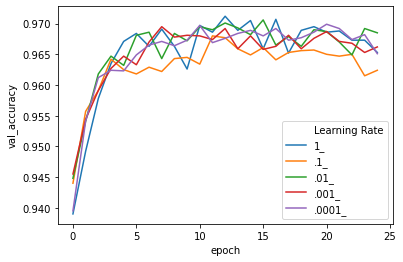

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

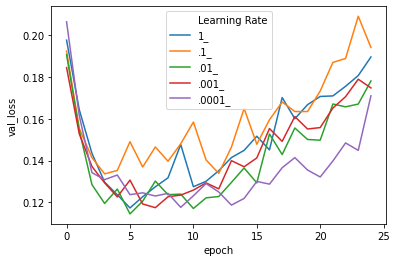

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [ ]:
adad = create_model(optimizer=Adadelta).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32, 
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - accuracy: 0.9046 - val_loss: 0.1948 - val_accuracy: 0.9434
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1703 - accuracy: 0.9504 - val_loss: 0.1541 - val_accuracy: 0.9524
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1378 - accuracy: 0.9593 - val_loss: 0.1381 - val_accuracy: 0.9601
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1188 - accuracy: 0.9653 - val_loss: 0.1299 - val_accuracy: 0.9632
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1068 - accuracy: 0.9697 - val_loss: 0.1190 - val_accuracy: 0.9679
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0973 - accuracy: 0.9717 - val_loss: 0.1207 - val_accuracy: 0.9682
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0912 - accuracy: 0.9743 - val_loss: 0.1143 - val_accuracy:

In [ ]:
agrad = create_model(optimizer=Adagrad).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32, 
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3450 - accuracy: 0.9003 - val_loss: 0.2065 - val_accuracy: 0.9369
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1877 - accuracy: 0.9442 - val_loss: 0.1640 - val_accuracy: 0.9494
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1514 - accuracy: 0.9553 - val_loss: 0.1439 - val_accuracy: 0.9566
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1293 - accuracy: 0.9619 - val_loss: 0.1373 - val_accuracy: 0.9583
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1150 - accuracy: 0.9658 - val_loss: 0.1278 - val_accuracy: 0.9632
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1037 - accuracy: 0.9703 - val_loss: 0.1256 - val_accuracy: 0.9634
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0952 - accuracy: 0.9726 - val_loss: 0.1312 - val_accuracy:

In [ ]:
adam = create_model(optimizer=Adam).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32, 
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3391 - accuracy: 0.9040 - val_loss: 0.2012 - val_accuracy: 0.9393
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1756 - accuracy: 0.9490 - val_loss: 0.1500 - val_accuracy: 0.9574
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9582 - val_loss: 0.1452 - val_accuracy: 0.9584
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1242 - accuracy: 0.9634 - val_loss: 0.1544 - val_accuracy: 0.9557
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1126 - accuracy: 0.9673 - val_loss: 0.1491 - val_accuracy: 0.9586
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1034 - accuracy: 0.9697 - val_loss: 0.1465 - val_accuracy: 0.9615
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0975 - accuracy: 0.9720 - val_loss: 0.1343 - val_accuracy:

In [ ]:
adamax = create_model(optimizer=Adamax).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32, 
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.9025 - val_loss: 0.2044 - val_accuracy: 0.9427
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1808 - accuracy: 0.9463 - val_loss: 0.1508 - val_accuracy: 0.9552
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1431 - accuracy: 0.9574 - val_loss: 0.1326 - val_accuracy: 0.9611
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1234 - accuracy: 0.9633 - val_loss: 0.1269 - val_accuracy: 0.9650
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1117 - accuracy: 0.9673 - val_loss: 0.1361 - val_accuracy: 0.9616
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1021 - accuracy: 0.9701 - val_loss: 0.1334 - val_accuracy: 0.9620
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0949 - accuracy: 0.9722 - val_loss: 0.1337 - val_accuracy:

In [ ]:
ftrl = create_model(optimizer=Ftrl).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32, 
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3281 - accuracy: 0.9068 - val_loss: 0.1849 - val_accuracy: 0.9433
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1647 - accuracy: 0.9514 - val_loss: 0.1711 - val_accuracy: 0.9505
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9603 - val_loss: 0.1327 - val_accuracy: 0.9601
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1185 - accuracy: 0.9658 - val_loss: 0.1303 - val_accuracy: 0.9624
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1065 - accuracy: 0.9695 - val_loss: 0.1275 - val_accuracy: 0.9661
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0974 - accuracy: 0.9722 - val_loss: 0.1193 - val_accuracy: 0.9668
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.9741 - val_loss: 0.1503 - val_accuracy:

In [ ]:
nadam = create_model(optimizer=Nadam).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32, 
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3438 - accuracy: 0.9009 - val_loss: 0.2032 - val_accuracy: 0.9413
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1817 - accuracy: 0.9467 - val_loss: 0.1528 - val_accuracy: 0.9533
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1403 - accuracy: 0.9585 - val_loss: 0.1348 - val_accuracy: 0.9610
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1212 - accuracy: 0.9642 - val_loss: 0.1268 - val_accuracy: 0.9644
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9684 - val_loss: 0.1236 - val_accuracy: 0.9667
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0983 - accuracy: 0.9708 - val_loss: 0.1297 - val_accuracy: 0.9650
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0900 - accuracy: 0.9737 - val_loss: 0.1303 - val_accuracy:

In [ ]:
opt = create_model(optimizer=Optimizer).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32, 
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3412 - accuracy: 0.9022 - val_loss: 0.2085 - val_accuracy: 0.9366
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1812 - accuracy: 0.9466 - val_loss: 0.1519 - val_accuracy: 0.9561
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1442 - accuracy: 0.9581 - val_loss: 0.1380 - val_accuracy: 0.9598
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1237 - accuracy: 0.9638 - val_loss: 0.1277 - val_accuracy: 0.9621
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1103 - accuracy: 0.9677 - val_loss: 0.1221 - val_accuracy: 0.9663
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1019 - accuracy: 0.9712 - val_loss: 0.1210 - val_accuracy: 0.9675
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0923 - accuracy: 0.9740 - val_loss: 0.1247 - val_accuracy:

In [ ]:
rms = create_model(optimizer=RMSprop).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32, 
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3557 - accuracy: 0.8992 - val_loss: 0.2084 - val_accuracy: 0.9385
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1910 - accuracy: 0.9441 - val_loss: 0.1581 - val_accuracy: 0.9538
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1463 - accuracy: 0.9574 - val_loss: 0.1464 - val_accuracy: 0.9583
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1235 - accuracy: 0.9643 - val_loss: 0.1344 - val_accuracy: 0.9637
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1098 - accuracy: 0.9678 - val_loss: 0.1382 - val_accuracy: 0.9600
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1004 - accuracy: 0.9713 - val_loss: 0.1275 - val_accuracy: 0.9653
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0951 - accuracy: 0.9732 - val_loss: 0.1257 - val_accuracy:

In [ ]:
sgd = create_model(optimizer=SGD).fit(X_train, y_train,
                                epochs=25,
                                batch_size=32, 
                                validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3447 - accuracy: 0.9012 - val_loss: 0.2020 - val_accuracy: 0.9393
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1918 - accuracy: 0.9430 - val_loss: 0.1956 - val_accuracy: 0.9417
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1573 - accuracy: 0.9542 - val_loss: 0.1437 - val_accuracy: 0.9584
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1355 - accuracy: 0.9599 - val_loss: 0.1471 - val_accuracy: 0.9586
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1204 - accuracy: 0.9657 - val_loss: 0.1310 - val_accuracy: 0.9635
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1088 - accuracy: 0.9687 - val_loss: 0.1281 - val_accuracy: 0.9662
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1001 - accuracy: 0.9711 - val_loss: 0.1290 - val_accuracy:

In [ ]:
import seaborn as sns
import pandas as pd

batch_sizes = []

for exp, result in zip([adad, agrad, adam, adamax, ftrl, nadam, opt, rms, sgd], 
                       ["Adadelta_", "Adagrad_", "Adam_", "Adamax_", "Ftrl_", 
                        "Nadam_", "Optimizer_", "RMSprop_", "SGD_"]):

  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Learning Rate'] = result

  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,0.338854,0.904600,0.194831,0.9434,0,Adadelta_
1,0.170344,0.950400,0.154086,0.9524,1,Adadelta_
2,0.137788,0.959350,0.138080,0.9601,2,Adadelta_
3,0.118833,0.965267,0.129935,0.9632,3,Adadelta_
4,0.106840,0.969700,0.119042,0.9679,4,Adadelta_


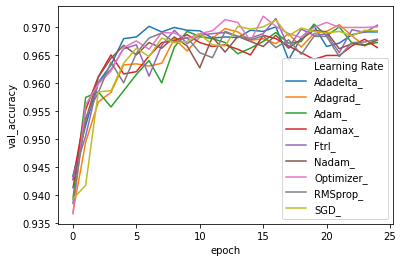

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

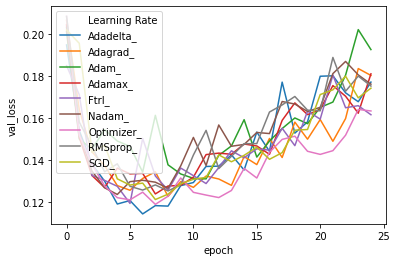

In [ ]:
sns.lineplot(x='epoch', y='val_loss', hue='Learning Rate', data=df);

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 

In a Neural Network Backpropagation is the process of updating weights at the end of each training loop of a model. The weights of each layer is updated in reverse order. When a Neural Network loop is finished, the error of the ouput is calculated and used to update the weights. Once the weights have been updated the model is run again using the new weights in order to produce a more accurate output.




## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


